## **Anlegen einer "copy only" Datensicherung:**

In [ ]:
/* 
  Sicherung der TESTDB als "Copy Only" Sicherung
*/
BACKUP DATABASE [TESTDB] 
TO  DISK = 
N'C:\[BackupPfad]\TestDB.bak' 
WITH  COPY_ONLY, NOFORMAT, NOINIT,  NAME = N'TESTDB-Vollständig Datenbank Sichern', SKIP, NOREWIND, NOUNLOAD,  STATS = 10
GO

## 
## **Wiederherstellen einer "copy only" Datensicherung:**

In [ ]:
RESTORE VERIFYONLY
FROM DISK = N'C:\[BackupPfad]\TestDB.bak'
GO

## 
## **Anlegen einer "Snapshot" Datenbank**

In [ ]:
CREATE DATABASE WaWi_ss ON 
(NAME = WaWi,
FILENAME = N'C:\[BackupPfad]\WaWi.ss') 
AS SNAPSHOT OF [WaWi]
GO

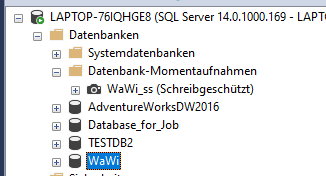

## 
## **Wiederherstellen einer "Snapshot" Datenbank:**

In [ ]:
USE master
RESTORE DATABASE [WaWi] 
FROM DATABASE_SNAPSHOT = 'WaWi_ss'

GO

## **Aufruf eines Ausführungsplans**

In [ ]:
SELECT 
a.sql_handle
, a.plan_generation_num
, a.plan_handle
, a.execution_count
, a.query_hash
, a.query_plan_hash
, b.text
, c.query_plan
FROM sys.dm_exec_query_stats a
CROSS APPLY sys.dm_exec_sql_text(sql_handle) b
CROSS APPLY sys.dm_exec_query_plan(plan_handle) c